In [4]:
import os
import sys
import numpy as np
import pandas as pd
import scipy
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
# Визуализация итераций
from tqdm import tqdm_notebook
import itertools
# Визуализация разделяющей поверхности классов
from mlxtend.plotting import plot_decision_regions

In [14]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

Сгенерируем случайную выборку

In [187]:
N = 200
x = np.random.uniform(-2, 2, size=(N, 2))
# Истинная зависимость: y(x) = [x_0 - 0.45*x_0^3 > 0]
y = 1*(x[:, 1] - x[:, 0] + 0.45*x[:, 0]**3 + np.random.normal(scale=0.2, size=N) > 0)

Изобразим классификацию по методу 1 и 3 ближайших соседей по Евклидовой метрике

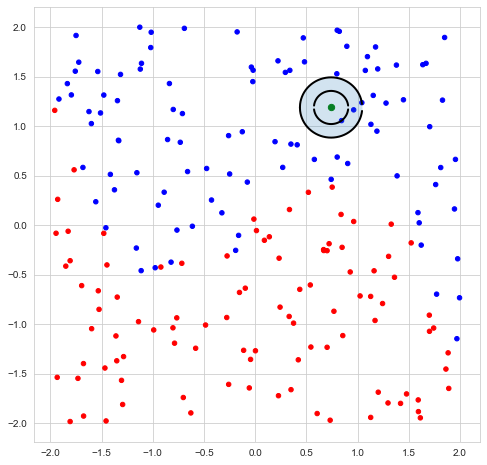

In [235]:
plt.scatter(x[:, 0], x[:, 1], c=np.array(['red', 'blue'])[y], s=20);
rand_point = np.random.uniform(-2, 2, size=(1, 2))
plt.scatter(rand_point[:, 0], rand_point[:, 1], color='green', s=40);
# Найдём расстояния от данной точки до всех точек выборки
distances = np.sort(scipy.spatial.distance.cdist(XA=rand_point, XB=x, metric='euclidean'))[0]
# Нарисуем область до ближайшего соседа
radius_1 = distances[0]
xx = np.linspace(rand_point[0, 0] - radius_1, rand_point[0, 0] + radius_1, 300)
yy_upper = lambda x, radius: rand_point[0, 1] + np.sqrt(radius**2 - (x - rand_point[0, 0])**2)
yy_lower = lambda x, radius: rand_point[0, 1] - np.sqrt(radius**2 - (x - rand_point[0, 0])**2)
plt.plot(xx, yy_upper(xx, radius_1), color='black', linewidth=2)
plt.plot(xx, yy_lower(xx, radius_1), color='black', linewidth=2);
# Нарисуем область до ближайших 3х соседей
radius_3 = distances[2]
xx = np.linspace(rand_point[0, 0] - radius_3, rand_point[0, 0] + radius_3, 300)
plt.plot(xx, yy_upper(xx, radius_3), color='black', linewidth=2)
plt.plot(xx, yy_lower(xx, radius_3), color='black', linewidth=2);
plt.fill_between(xx, yy_upper(xx, radius_3), yy_lower(xx, radius_3), alpha=0.2)

То же самое, в метрике Манхэттен

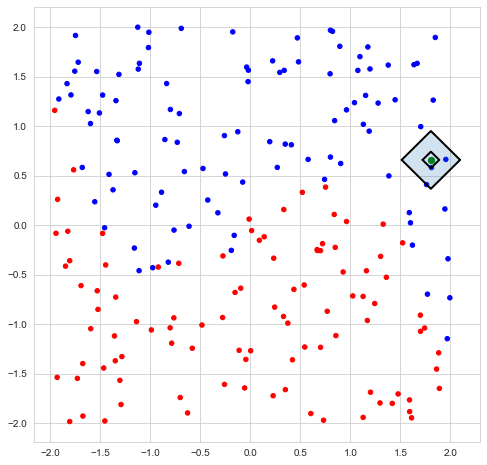

In [236]:
plt.scatter(x[:, 0], x[:, 1], c=np.array(['red', 'blue'])[y], s=20);
rand_point = np.random.uniform(-2, 2, size=(1, 2))
plt.scatter(rand_point[:, 0], rand_point[:, 1], color='green', s=40);
# Найдём расстояния от данной точки до всех точек выборки
distances = np.sort(scipy.spatial.distance.cdist(XA=rand_point, XB=x, metric='cityblock'))[0]
# Нарисуем область до ближайшего соседа
radius_1 = distances[0]
xx = np.linspace(rand_point[0, 0] - radius_1, rand_point[0, 0] + radius_1, 300)
yy_upper_triangle = lambda x, radius: radius + rand_point[0, 1] - np.abs(x - rand_point[0, 0])  
yy_lower_triangle = lambda x, radius: -radius + rand_point[0, 1] + np.abs(x - rand_point[0, 0])  
plt.plot(xx, yy_upper_triangle(xx, radius_1), color='black', linewidth=2)
plt.plot(xx, yy_lower_triangle(xx, radius_1), color='black', linewidth=2);
# Нарисуем область до ближайших 3х соседей
radius_3 = distances[2]
xx = np.linspace(rand_point[0, 0] - radius_3, rand_point[0, 0] + radius_3, 300)
plt.plot(xx, yy_upper_triangle(xx, radius_3), color='black', linewidth=2)
plt.plot(xx, yy_lower_triangle(xx, radius_3), color='black', linewidth=2);
plt.fill_between(xx, yy_upper_triangle(xx, radius_3), yy_lower_triangle(xx, radius_3), alpha=0.2)
# plt.ylim(-1, 1)

Как выглядит разделяющая граница при различном числе соседей

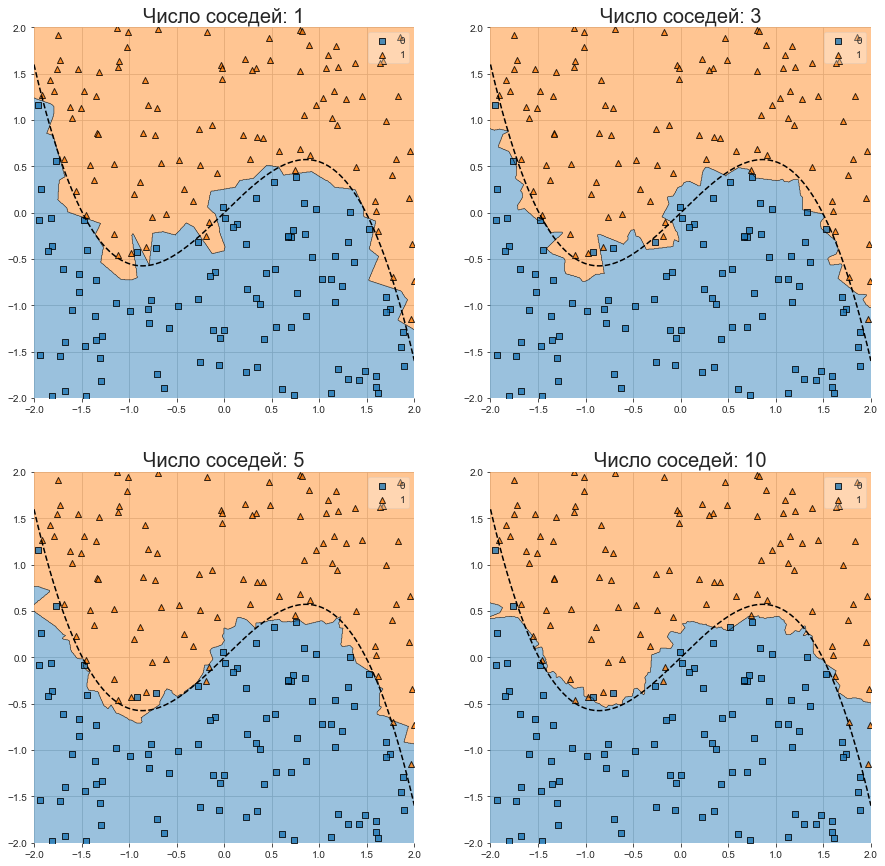

In [221]:
# Загружаем KNN классификатор
from sklearn.neighbors import KNeighborsClassifier

xx = np.linspace(-2, 2, 500)
yy = lambda x: x - 0.45*x**3
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
neighbours = [1, 3, 5, 10]
for n, (i, j) in tqdm_notebook(enumerate(itertools.product(range(2), range(2)))):
    # Инициализируем модель и задаём параметры (по умолчанию метрика Евклидова)
    knn = KNeighborsClassifier(n_neighbors=neighbours[n])
    # Обучаем модель
    knn.fit(x, y)
    # Рисуем разделяющую границу
    plot_decision_regions(x, y, knn, ax=ax[i, j])
    # Истинная зависимость
    ax[i, j].plot(xx, yy(xx), linestyle='--', color='black')
    ax[i, j].set_xlim(-2, 2)
    ax[i, j].set_ylim(-2, 2);
    ax[i, j].set_title('Число соседей: {}'.format(neighbours[n]), fontsize=20);